In [20]:
import matplotlib.pyplot as plt
import torch
import pytorch_measure as pm
N = 50 # number of weights
verbose = True
dev = 'cpu'

data = torch.randn(10000).to(dev)
#l = [min(data).item(), max(data).item()]
w = torch.softmax(torch.ones(N,dtype=torch.float),dim=-1).to(dev)
w = torch.nn.parameter.Parameter(w)
l = torch.linspace(-4, 4, N, requires_grad=False).to(dev)
# if l is min & max only
#index = [round((y.item() - l[0]) * (N - 1) / (l[1] - l[0])) for y in data]
# if l is all locations
index = torch.argmin(abs(l-data.view(-1,1)), dim=1)
def NLLLoss(w):
    return -w[index].log().sum()

sd = (data - l[index])**2
def WardLoss(w):
    return sum(sd * w[index])


Epoch: 0          Loss: 43652      LR: 0.0001
Epoch: 1000       Loss: 41943      LR: 0.0001
Epoch: 2000       Loss: 40637      LR: 0.0001
Epoch: 3000       Loss: 39725      LR: 0.0001
Epoch: 4000       Loss: 39567      LR: 0.0001
Epoch: 5000       Loss: 39567      LR: 0.0001
Epoch: 6000       Loss: 39567      LR: 0.0001
Epoch: 7000       Loss: 39567      LR: 0.0001
Epoch: 8000       Loss: 39567      LR: 0.0001
Epoch: 9000       Loss: 39567      LR: 0.0001


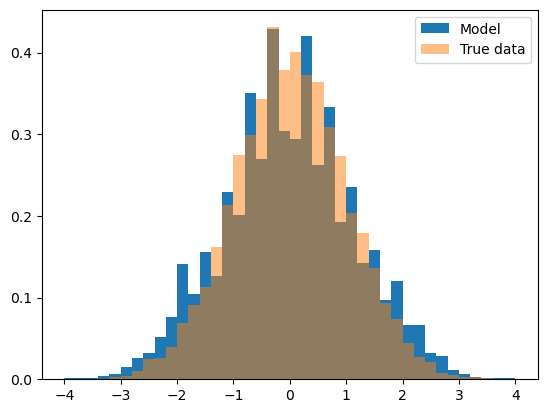

In [5]:
measure = pm.Measure(locations=l, weights=w, device=dev)
opt = pm.Optimizer(measure)
lr = 1e-4
for epoch in range(10000):
    measure.zero_gradient()
    loss = NLLLoss(measure.weights)
    loss.backward()

    opt.step(lr)

    if epoch % 1000 == 0 and verbose:
        print(f'Epoch: {epoch:<10} Loss: {loss:<10.0f} LR: {lr}')


plt.hist(measure.sample(10000),bins=40, density=True, range=[-4,4])
plt.hist(torch.randn(10000),bins=40, density=True, range=[-4,4], alpha=0.5)
plt.legend(['Model','True data'])
plt.show()


Epoch: 0          Loss: 0.0000000  LR: 0.1
Epoch: 1          Loss: 0.0000000  LR: 0.1
Epoch: 2          Loss: 0.0000000  LR: 0.1
Epoch: 3          Loss: 0.0000000  LR: 0.1
Epoch: 4          Loss: 0.0000000  LR: 0.1
Epoch: 5          Loss: 0.0000000  LR: 0.1
Epoch: 6          Loss: 0.0000000  LR: 0.1
Epoch: 7          Loss: 0.0000000  LR: 0.1
Epoch: 8          Loss: 0.0000000  LR: 0.1
Epoch: 9          Loss: 0.0000000  LR: 0.1


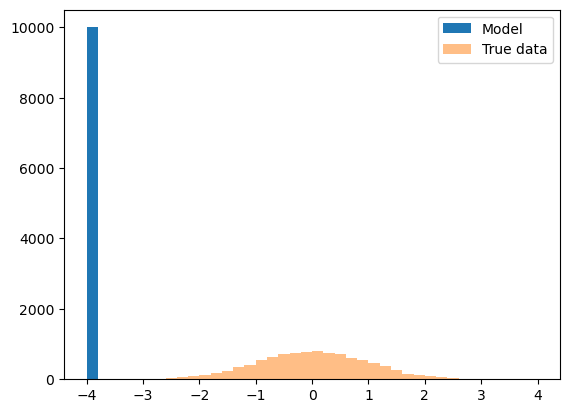

In [24]:
measure = pm.Measure(locations=l, weights=w, device=dev)
opt = pm.Optimizer(measure)
lr = 1e-1
for epoch in range(10):
    measure.zero_gradient()
    loss = WardLoss(measure.weights)
    loss.backward()

    opt.step(lr)

    if epoch % 1 == 0 and verbose:
        print(f'Epoch: {epoch:<10} Loss: {loss:<10.7f} LR: {lr}')


plt.hist(measure.sample(10000),bins=40, density=False, range=[-4,4])
plt.hist(torch.randn(10000),bins=40, density=False, range=[-4,4], alpha=0.5)
plt.legend(['Model','True data'])
plt.show()
